In [2]:
import pandas as pd
import torch
from kan import KAN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
)
df = pd.get_dummies(df, columns=["species"])
print(df.iloc[:, :4])
print(df.iloc[:, 4:])

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     species_setosa  species_versicolor  species_virginica
0              True               False              False
1              True               False              False
2              True               False              False
3              True               False     

torch.Size([1000, 1])


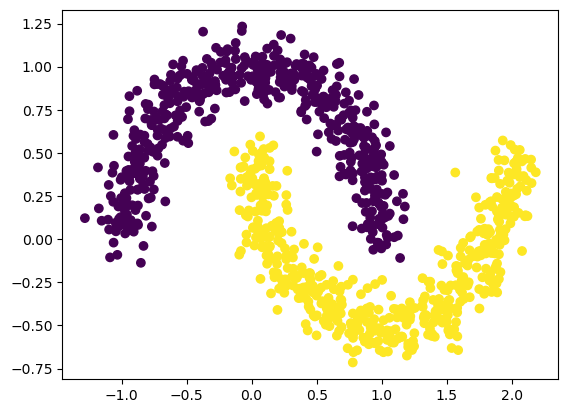

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4].to_numpy(), df.iloc[:, 4:].to_numpy(), test_size=0.33, random_state=42)

from sklearn.datasets import make_moons

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).to(torch.float32)
dataset['test_input'] = torch.from_numpy(test_input).to(torch.float32)
dataset['train_label'] = torch.from_numpy(train_label[:,None]).to(torch.float32)
dataset['test_label'] = torch.from_numpy(test_label[:,None]).to(torch.float32)

X = dataset['train_input']
y = dataset['train_label']
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y)

train loss: 1.61e-01 | test loss: 1.59e-01 | reg: 4.35e+00 : 100%|██| 20/20 [00:00<00:00, 29.50it/s]


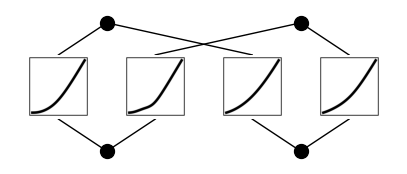

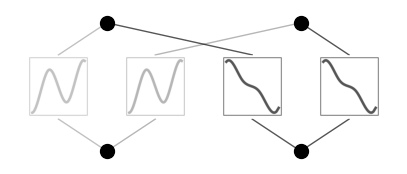

In [42]:
model = KAN(width=[2,2], grid=3, k=3)

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc));
results['train_acc'][-1], results['test_acc'][-1]

# 'Beta' controls the transparency of activations. 
# Larger 'Beta' => more activation functions show up. We usually want to set a proper beta such that only important connections are visually significant.
model.prune()
model.plot(mask=True,beta=3)

In [40]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.9653122425079346
fixing (0,0,1) with sin, r2=0.9654086232185364
fixing (0,1,0) with tan, r2=0.9813528656959534
fixing (0,1,1) with tan, r2=0.9812689423561096


-0.38*sin(3.08*x_1 - 7.83) - 0.84*tan(0.89*x_2 - 0.22) + 0.5